# Linearna regresija
Vrijeme je da upoznamo naš prvi model strojnog učenja i to je upravo linearna regresija. Linearna regresija je algoritam koji predviđa numeričku oznaku (očito, ipak se radi o regresiji zar ne?). To je algoritam nadziranog strojnog učenja, to jest potrebne su nam oznake za svaki primjer. Zašto se linearna regresija zove linearnom? Zato što je oznaka koja se predviđa linearna kombinacija značajki. To jest vrijedi:
$$
h(\boldsymbol{x} ; \boldsymbol{w}) = w_0 + w_{1} x_{1} + w_{2} x_{2} + \dots + w_{n} x_{n} 
$$
Primjetite da se umjesto vektora $\boldsymbol{\theta}$ koristi oznaka $\boldsymbol{w}$. Ovo je samo konvencije radi, ali i jedno i drugo su parametri. $\boldsymbol{w}$ dolazi od engleskog *weight*, zato što taj vektor definira težinu svake značajke u linearnoj kombinaciji.

Pošto je riječ o linearnoj kombinaciji riječ je o pravcu u dvije dimenzije, ravnini u tri, te hiperravnini u višedimenzionalnom prostoru.Obratite pozornost na težinu $w_0$, to je takozvani \emph{bias} koji omogućuje da da hiperravninu pomaknemo od ishodišta. Jednostavna ilustracije zašto nam je to potrebno je primjerice procjena visine na temelju godina. Čak i kada netko ima $0$ godina, to jest promatramo novorođenče, nemoguće je da je visine $0$.

Izvrsno, model smo definirali, sada je potrebno odabrati funkciju pogreške odnosno gubitka. Kod modela linearne regresije biramo kvadratno odstupanje kao funkciju pogreške to jest:
$$
\mathcal{E}(h | \mathcal{D}) = \frac{1}{2} \sum_{i = 1}^{N} (y^{(i)} - h(\boldsymbol{x}^{(i)}))^2
$$
Naučili smo da je pogreška u pravilu očekivani gubitak na primjeru, ali ovdje radi matematičke jednostavnosti izvoda umjesto $\frac{1}{N}$ sumu gubitaka množimo s $\frac{1}{2}$. Primjetite da će obje funkcije imati minimum za iste parametre, pa je ustvari svejedno koju funkciju minimiziramo.

Još nam ostaje definirati optimizacijski postupak. Za početak ćemo ga definirati samo u jednodimenzionalnom slučaju, a potom ćemo ga generalizirati na više dimenzija.


Za početak pogledajmo jedan elementaran primjer:

In [17]:
# učitajmo sve potrebne biblioteke

import numpy as np  # osnovna biblioteka za obradu matrica
from sklearn.linear_model import LinearRegression  # model linearne regresije koji će biti korišten kasnije
from sklearn.preprocessing import PolynomialFeatures  # Polinomijalna transformacija
import matplotlib.pyplot as plt  # biblioteka za vizualizaciju

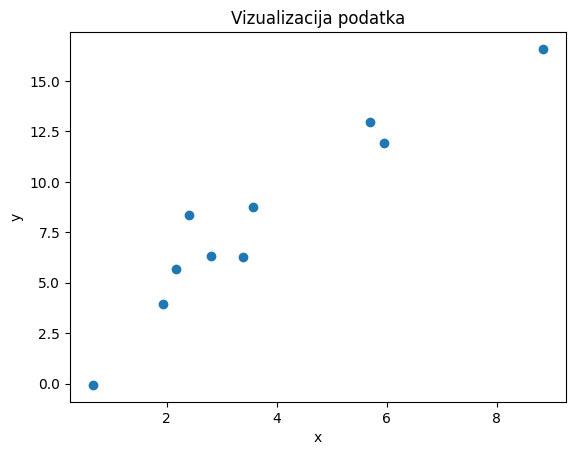

In [26]:
N = 10
X = np.random.uniform(0, 10, size=N)
np.sort(X)

y = 2 * X + 1 + 2 * np.random.randn(X.shape[0]) 

plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vizualizacija podatka')
plt.show()

Već golim okom možemo vidjeti da su oznake `y` linearno zavisne od podatku `x`, a i pogledom na stvarnu distribuciju značajki znamo da stvarno i jest riječ o pravcu. Želimo sada naučiti model linearne regresije nad danim podatcima. Znamo da je to model oblika: 
$$ h(x) = w_0 + w_1x $$
Postavlja se pitanje kako pronaći optimalne parametre $w_0$ i $w_1$. Može se pokazati, da optimalne parametre možemo dobiti analitčki, sljedećom formulom:
$$  w_0 = \overline{y} - w_1 \overline{x} $$
$$  w_1 = \frac{\sum_{i}^{n} x^{(i)}y^{(i)} - N\overline{x}\overline{y}}{\sum_{i}^{N}(x^{(i)})^2 - N \overline{x}^2}$$

Izračunajmo ih!

In [27]:
x_bar = np.mean(X)
y_bar = np.mean(y)

sum_x_y = np.sum(X * y)
sum_x_x = np.sum(X * X)

w_1 = (sum_x_y - N * x_bar * y_bar) / (sum_x_x - N * x_bar * x_bar)
w_0 = y_bar - w_1 * x_bar

print(f'Parametar w_0 je {w_0}, a parametar w_1 je {w_1}')

Parametar w_0 je 1.0272935688488207, a parametar w_1 je 1.8836219465226247


Uvjerimo se u točnost ove procjene. Prvo ćemo izračunati pogrešku, a zatim ćemo regresijski pravac i nacrtati.

In [28]:
model = lambda x: w_0 + w_1 * x  # Ovo radi i za jedan primjer, ali i za ndarray primjera. Zašto?

error = np.mean((y - model(X))**2)
print(f'Pogreška modela je: {error}')

Pogreška modela je: 1.9410628637111262


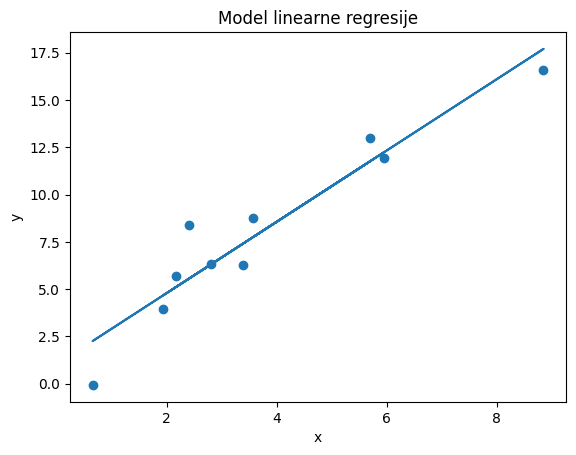

In [29]:
plt.scatter(X, y)
plt.plot(X, model(X))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model linearne regresije')
plt.show()

Uvjerili smo se da optimizacijski postupak radi. No ovo je postupak za podatke koji se sastoje od samo jedne značajke, u praksi želimo koristit više značajki, zato što na oznake često utječe više faktora. Primjerice na cijenu stana utječu i kvadratura i godina izgradnje. Generalizacija optimizacijskog postupka, na više značajki zove se **metoda najmanjih kvadrata**. Sada polazimo od matrice dizajna $\boldsymbol{X}$ proširene *dummy* značajkom (ta je značajka fiksna za sve podatke, uvijek iznosi $1$ te služi za modeliranje težine $w_0$).

$$
 \boldsymbol{X} = \begin{bmatrix} 
    1 & x^{(1)}_{1} & x^{(1)}_{2} & \dots & x^{(1)}_{n}\\
    1 & x^{(2)}_{1} & x^{(2)}_{2} & \dots & x^{(2)}_{n}\\
    \vdots &\vdots & \vdots & \ddots &  \vdots \\
    1 & x^{(N)}_{1} & x^{(N)}_{2} & \dots & x^{(N)}_{n} 
    \end{bmatrix}_{N \times (n + 1)}
$$

Također imamo i pripadni vektor oznaka:
$$
 \boldsymbol{y} = \begin{bmatrix}
     y^{(1)} \\ 
     y^{(2)} \\
     \vdots \\ 
     y^{(N)}
 \end{bmatrix}_{N \times 1}
$$

U idealnom slučaju želimo pronaći one težine $\boldsymbol{w}$ za koje vrijedi

$$
\boldsymbol{X} \boldsymbol{w} = \boldsymbol{y}
$$

Kada bi ovo vrijedilo, težine bi jednostavno izračunali na sljedeći način

$$
 \boldsymbol{w} = \boldsymbol{X}^{-1} \boldsymbol{y}
$$

Nažalost, moramo koristiti inverz matrice. Inverz postoji samo za neke simetrične matrice, a mi bi smo idealno htjeli imati više podataka od značajki. Iz tog razloga posežemo za pseudoinverzom matrice $\boldsymbol{X}^+$, koji je generalizacija koncepta inverza za sve matrice.

Vrijedi sljedeće
$$
argmin_w\Vert \boldsymbol{y} - \boldsymbol{X} \boldsymbol{w} \Vert = \boldsymbol{X}^+ \boldsymbol{y}
$$
Pošto je riječ o eukldiskoj normi, vektor težina $\boldsymbol{w}$ su upravo optimalni parametri koji minimiziraju kvadratno odstupanje.

Pogledajmo primjer:

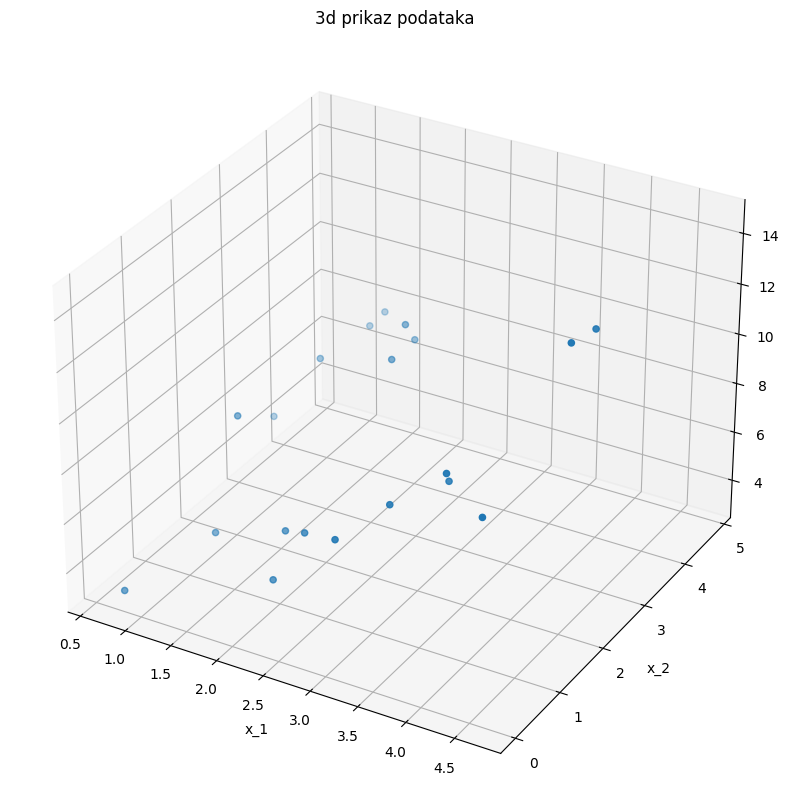

In [34]:
N = 20
x_1 = np.random.uniform(0,5,N)
x_2 = np.random.uniform(0,5,N)

y = 2 * x_1 + x_2 + 1 + np.random.normal(0, 1, N)

# plotting

fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

ax.scatter(
  x_1,
  x_2,
  y
)

plt.title('3d prikaz podataka')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

plt.show()